In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [3]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = df['Frame']/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0      1              0.848         0.0001     90.270968              NaN   
1      2              0.758         0.0002     80.690323              NaN   
2      3              0.879         0.0003     93.570968              NaN   
3      4              0.848         0.0004     90.270968              NaN   
4      5              0.879         0.0005     93.570968              NaN   

    igb    ff      ffigb      igbff  
0  igb1  ff94  ff94 igb1  igb1 ff94  
1  igb1  ff94  ff94 igb1  igb1 ff94  
2  igb1  ff94  ff94 igb1  igb1 ff94  
3  igb1  ff94  ff94 igb1  igb1 ff94  
4  igb1  ff94  ff94 igb1  igb1 ff94  


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

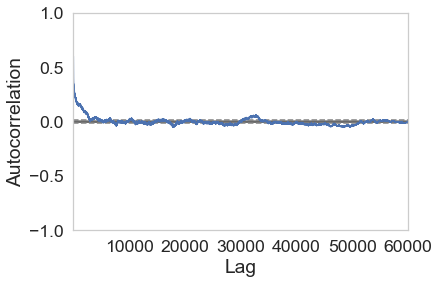

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
pd.plotting.autocorrelation_plot(df['Helicity (%)'])

In [39]:
a=df_total.loc[df_total["igbff"] == igbs[0]+' '+ffs[0], 'Helicity (%)']

In [40]:
a

0        90.270968
1        80.690323
2        93.570968
3        90.270968
4        93.570968
           ...    
59995    80.690323
59996    61.316129
59997    51.629032
59998    61.316129
59999    64.509677
Name: Helicity (%), Length: 60000, dtype: float64

(0.0, 5000.0)

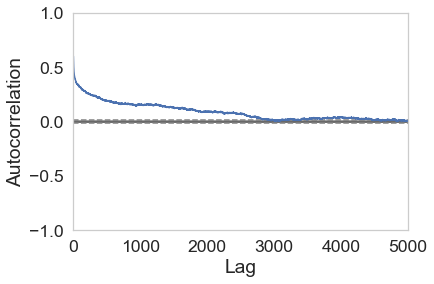

In [29]:
# fig, ax = plt.subplots(figsize=(5,4))
ax=pd.plotting.autocorrelation_plot(df['Helicity (%)'])
ax.set_xlim([0, 5000])

In [44]:
igbffs=[]
for j in range(0,13):
    for i in range(0,5):
        igbffs.append(igbs[i]+' '+ffs[j])
len(igbffs

['igb1 ff94',
 'igb2 ff94',
 'igb5 ff94',
 'igb7 ff94',
 'igb8 ff94',
 'igb1 ff96',
 'igb2 ff96',
 'igb5 ff96',
 'igb7 ff96',
 'igb8 ff96',
 'igb1 ff98',
 'igb2 ff98',
 'igb5 ff98',
 'igb7 ff98',
 'igb8 ff98',
 'igb1 ff99',
 'igb2 ff99',
 'igb5 ff99',
 'igb7 ff99',
 'igb8 ff99',
 'igb1 ff99SB',
 'igb2 ff99SB',
 'igb5 ff99SB',
 'igb7 ff99SB',
 'igb8 ff99SB',
 'igb1 ff99SBildn',
 'igb2 ff99SBildn',
 'igb5 ff99SBildn',
 'igb7 ff99SBildn',
 'igb8 ff99SBildn',
 'igb1 ff99SBnmr',
 'igb2 ff99SBnmr',
 'igb5 ff99SBnmr',
 'igb7 ff99SBnmr',
 'igb8 ff99SBnmr',
 'igb1 ff03.r1',
 'igb2 ff03.r1',
 'igb5 ff03.r1',
 'igb7 ff03.r1',
 'igb8 ff03.r1',
 'igb1 ff14SB',
 'igb2 ff14SB',
 'igb5 ff14SB',
 'igb7 ff14SB',
 'igb8 ff14SB',
 'igb1 ff14SBonlysc',
 'igb2 ff14SBonlysc',
 'igb5 ff14SBonlysc',
 'igb7 ff14SBonlysc',
 'igb8 ff14SBonlysc',
 'igb1 ff14ipq',
 'igb2 ff14ipq',
 'igb5 ff14ipq',
 'igb7 ff14ipq',
 'igb8 ff14ipq',
 'igb1 fb15',
 'igb2 fb15',
 'igb5 fb15',
 'igb7 fb15',
 'igb8 fb15',
 'igb1 ff15ipq'

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


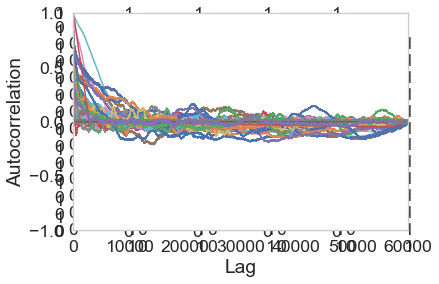

In [51]:
fig, axes = plt.subplots(13, 5)

axes = axes.ravel()
for i in range(0,len(igbffs)):
    axes[i]=pd.plotting.autocorrelation_plot(df_total.loc[df_total["igbff"] == igbffs[i], 'Helicity (%)'])
#     axes[i].set_xlim([0, 5000])
